## Logistic Regression_classification

## example1

In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

In [4]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_63a9cff2ccd745f4aac0141b03cee536 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cEkITcKpSqIivMFetABvhrJF560Yblivtr_CN6eEn6kj',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_63a9cff2ccd745f4aac0141b03cee536.get_object(Bucket='appleexample-donotdelete-pr-yizabrb7keakap',Key='fruit_data_with_colors.txt.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fruits = pd.read_csv(body)

In [5]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'width')

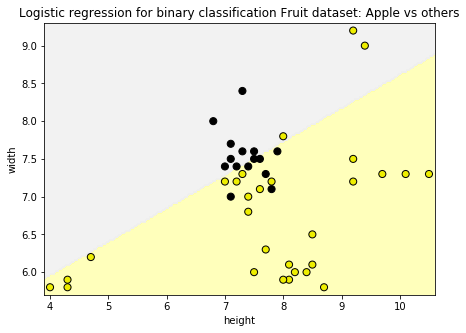

In [17]:
fig,subaxes = plt.subplots(1,1,figsize=(7,5))
y_fruits_apple = y_fruits_2d ==1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_fruits_2d.as_matrix(),y_fruits_apple.as_matrix(),random_state=0)
clf = LogisticRegression(C=100).fit(X_train,y_train)
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,None,None,'Logistic regression for binary classification Fruit dataset: Apple vs others',subaxes)
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

In [8]:
h = 6
w = 8
print(['not an apple','an apple'][clf.predict([[h,w]])[0]])

an apple


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()


In [9]:
h = 10
w = 7
print(['not an apple','an apple'][clf.predict([[h,w]])[0]])

not an apple


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()


In [18]:
print('Accuracy of logistic regression classifier (training): {:.2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of logistic regression classifier (test): {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of logistic regression classifier (training): 0.77
Accuracy of logistic regression classifier (test): 0.73


## example2

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)